In [32]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font',family='serif',size='16')
fig = plt.figure(1,figsize=(7,5))
#fig = plt.figure(1,figsize=(7, 5)) ## To save figure.

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)  

<Figure size 504x360 with 0 Axes>

# Manipulate files

In [33]:
import sys,os

In [34]:
a = [1,2,3]
ff= open('test.dat','w')
ff.write(str(a)+'\n') ## Don't forget the end enter sign.
ff.close()



In [35]:
command = 'ls -al | grep "test.dat"'
return_value = os.system(command)

In [36]:
print(return_value)

0


[1, 2, 3]



In [37]:
command = 'cp test.dat test2.dat'
return_value = os.system(command)

In [38]:
ff = open('test2.dat','r')
for lines in ff:
    print(lines)
    
ff.close()

[1, 2, 3]



## Homework: how to show the return values of a command line?


In [19]:
ff = open('test3.dat','r')
for lines in ff:
    print(lines)
    
ff.close()

FileNotFoundError: [Errno 2] No such file or directory: 'test3.dat'

# Working on Boolean

In [39]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [40]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [23]:
np.count_nonzero(x < 6)

8

In [24]:
# how many values less than 6 in each row? 
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [25]:
# are there any values greater than 8? 
np.any(x > 8)

True

In [26]:
np.all(x > 8)

False

In [27]:
# are there any values less than zero? 
np.any(x < 0)


False

In [8]:
# are all values less than 10? 
np.all(x < 10)

True

In [28]:
# are all values equal to 6? 
np.all(x == 6)

False

In [29]:
y = np.ones((3,4))
print(y)
print(np.all(y==1))

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
True


In [12]:
# are all values in each row less than 8? 
np.all(x < 8, axis=1)

array([ True, False,  True])

In [41]:
import pandas as pd
# use Pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('./PythonData/data/Seattle2014.csv')['PRCP'].values 
inches = rainfall / 254 # 1/10mm -> inches
inches.shape

(365,)

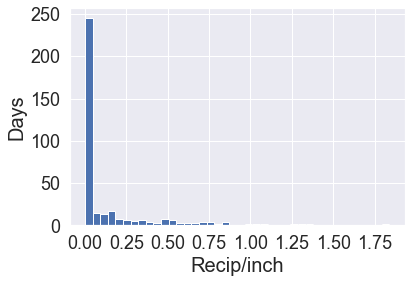

In [42]:
import seaborn; seaborn.set() # set plot styles
plt.hist(inches, 40)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Recip/inch',fontsize=20)
plt.ylabel('Days',fontsize=20)
plt.show()

In [43]:
np.sum((inches > 0.5) & (inches < 1))


29

In [44]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

In [46]:
print("Number days without rain: ", np.sum(inches == 0)) 
print("Number days with rain: ", np.sum(inches != 0)) 
print("Days with more than 0.5 inches:", np.sum(inches > 0.5)) 
print("Rainy days with < 0.1 inches :", np.sum((inches > 0) &
                                               (inches < 0.2)))

Number days without rain:  215
Number days with rain:  150
Days with more than 0.5 inches: 37
Rainy days with < 0.1 inches : 75


# Boolean array as masks

In [47]:
print(x)

x[x < 5]

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


array([0, 3, 3, 3, 2, 4])

In [48]:
# construct a mask of all rainy days 
rainy = (inches > 0)
# construct a mask of all summer days (June 21st is the 172nd day)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)
print("Median precip on rainy days in 2014 (inches): ", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches): ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ", np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):", np.median(inches[rainy & ~summer]))
### Homework: what '~' means?

Median precip on rainy days in 2014 (inches):  0.19488188976377951
Median precip on summer days in 2014 (inches):  0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


# Fancy indeces
# Example: Selecting Random Points

In [49]:
rand = np.random.RandomState(42)
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

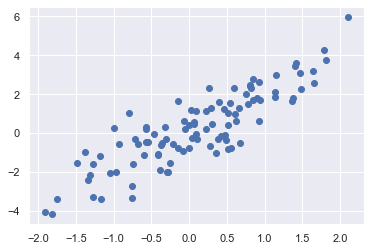

In [50]:
plt.scatter(X[:, 0], X[:, 1]);

In [51]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([50, 45, 37, 98, 48, 47, 97, 69, 52, 89, 94, 17, 93, 28, 23, 75, 53,
       42, 62, 41])

In [53]:
selection = X[indices] # fancy indexing here 
selection.shape

(20, 2)

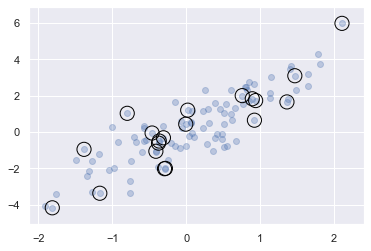

In [54]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],color='black',
            facecolor='none', s=200);

# Modifying values with fancy index

In [55]:
x = np.arange(10)
print("x:     ", x)
i = np.array([2, 1, 8, 4])
x[i] = 99 
print("x now: ", x)

x:      [0 1 2 3 4 5 6 7 8 9]
x now:  [ 0 99 99  3 99  5  6  7 99  9]


In [56]:
x[i] -= 10 
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


# Example: Binning Data


In [57]:
np.random.seed(42)
x = np.random.randn(100)
# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)
# find the appropriate bin for each x
i = np.searchsorted(bins, x) # add 1 to each of these bins
np.add.at(counts, i, 1)
## Homework: what's the meaning of 7th and 8th line?

In [58]:
ha, hb = np.histogram(x,bins=bins)

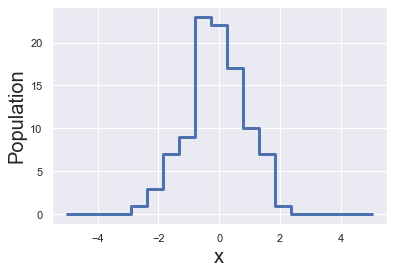

In [59]:
plt.plot(bins, counts,ds='steps',lw=3)

plt.xlabel('x',fontsize=20)
plt.ylabel('Population',fontsize=20)
plt.show()

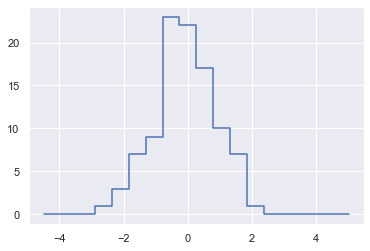

In [62]:
plt.plot(hb[1:],ha,ds='steps') ## ??
plt.show()

# Sorting Arrays

In [63]:
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i]) 
    return x



In [64]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x) ## Naive sort, low efficiency.

array([1, 2, 3, 4, 5])

In [65]:
np.sort(x) ## Build-in sort. High efficiency.

array([1, 2, 3, 4, 5])

In [66]:
x.sort() ## Another incarnation of build-in sorting.
print(x)

[1 2 3 4 5]


In [55]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x) ## Sort the index first.
print(i)

[1 0 3 2 4]


In [56]:
x[i] ## 3rd incarnation of build-in sorting.

array([1, 2, 3, 4, 5])

In [53]:
rand = np.random.RandomState(42) 
X = rand.randint(0, 10, (4, 6)) 
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [58]:
# sort each column of X 
np.sort(X, axis=0)


array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [59]:
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [67]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)


array([2, 1, 3, 4, 6, 5, 7])

# Example: k-Nearest Neighbors


In [68]:
rand = np.random.RandomState(42)

In [22]:
import seaborn; seaborn.set() # set plot styles

In [69]:

X = rand.rand(10, 2)

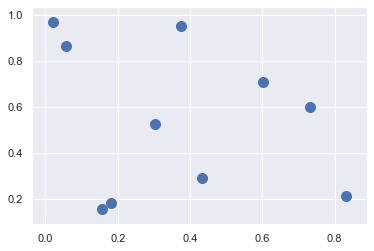

In [70]:
plt.scatter(X[:, 0], X[:, 1], s=100);


In [71]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)

## Distraction: Explanation of the command above
$$\begin{aligned}
X = \{(x_{i;0},x_{i;1}) \}_{i=0,1,\cdots,9}
\end{aligned}$$

$$\begin{aligned}
d^2_{i,j} = ((x_{i,0} - x_{j,0})^2 + (x_{i,1} - x_{j,1})^2)
\end{aligned}$$

## numpy.newaxis

```numpy.newaxis``` is used to *increase the dimension* of the existing array by one more dimension, when used *once*. 

Thus,
* 1D array will become 2D array
* 2D array will become 3D array
* 3D array will become 4D array
* 4D array will become 5D array

and so on..

Here is a visual illustration which depicts promotion of 1D array to 2D arrays.

![newaxis](./graph/zkMBy.png)

***Scenario-1***: ```np.newaxis``` might come in handy when you want to explicitly convert a 1D array to either a row vector or a column vector, as depicted in the above picture.


### Example:


In [72]:
# 1D array
arr = np.arange(4)
print("Shape of arr: ")
print(arr.shape)
print("====")

# make it as row vector by inserting an axis along first dimension
row_vec = arr[np.newaxis, :]     # arr[None, :]
print("Shape of the rwo_vec:")
print(row_vec.shape)
print("====")

# make it as column vector by inserting an axis along second dimension
col_vec = arr[:, np.newaxis]     # arr[:, None]
print("Shape of col_vec: ")
print(col_vec.shape)
print("====")

Shape of arr: 
(4,)
====
Shape of the rwo_vec:
(1, 4)
====
Shape of col_vec: 
(4, 1)
====


***Scenario-2***: 
When we want to make use of *numpy broadcasting*(https://numpy.org/devdocs/user/theory.broadcasting.html) as part of some operation, for instance while doing addition of some arrays.


### Example:

Let's say you want to add the following two arrays:

In [73]:
x1 = np.array([1, 2, 3, 4, 5])
x2 = np.array([5, 4, 3])

In [74]:
x1_new = x1[:, np.newaxis]    # x1[:, None]
# now, the shape of x1_new is (5, 1)
# array([[1],
#        [2],
#        [3],
#        [4],
#        [5]])

In [75]:
print(x1_new)

[[1]
 [2]
 [3]
 [4]
 [5]]


In [76]:
x1_new + x2


array([[ 6,  5,  4],
       [ 7,  6,  5],
       [ 8,  7,  6],
       [ 9,  8,  7],
       [10,  9,  8]])

Alternatively, you can also add new axis to the array ```x2```:

In [77]:
x2_new = x2[:, np.newaxis]    # x2[:, None]
print(x2_new)     # shape is (3, 1)

[[5]
 [4]
 [3]]


In [78]:
x1 + x2_new

array([[ 6,  7,  8,  9, 10],
       [ 5,  6,  7,  8,  9],
       [ 4,  5,  6,  7,  8]])

***Note***: Observe that we get the same result in both cases (but one being the transpose of the other).

***Scenario-3***: 
This is similar to scenario-1. But, you can use ```np.newaxis``` *more than once* to promote the array to higher dimensions. Such an operation is sometimes needed for higher order arrays (i.e. ***Tensors***).
    

### Example:



In [12]:
arr = np.arange(5*5).reshape(5,5)
print("Shape of arr: ")
print(arr.shape)
print("====")

# promoting 2D array to a 5D array
arr_5D = arr[np.newaxis, ..., np.newaxis, np.newaxis]    # arr[None, ..., None, None]

print("Shape of arr_5D: ")
print(arr_5D.shape)


Shape of arr: 
(5, 5)
====
Shape of arr_5D: 
(1, 5, 5, 1, 1)


### Now let's get back to our example.

In [79]:
print(dist_sq)

[[0.         0.25171654 0.67933117 0.10729142 0.11021119 0.12565305
  0.75487265 0.62590345 0.1863819  0.43821601]
 [0.25171654 0.         0.52769893 0.52572083 0.02910074 0.64393098
  0.1593326  0.47512176 0.18843303 0.18454216]
 [0.67933117 0.52769893 0.         0.51394921 0.50290096 0.68080058
  0.46072414 0.00141727 0.15795558 0.09442377]
 [0.10729142 0.52572083 0.51394921 0.         0.31987984 0.01216687
  1.02713477 0.48148903 0.17716149 0.47033641]
 [0.11021119 0.02910074 0.50290096 0.31987984 0.         0.40557444
  0.29926414 0.45108072 0.12173825 0.20237694]
 [0.12565305 0.64393098 0.68080058 0.01216687 0.40557444 0.
  1.23302708 0.64458914 0.27862329 0.62982499]
 [0.75487265 0.1593326  0.46072414 1.02713477 0.29926414 1.23302708
  0.         0.42414057 0.37660024 0.16662198]
 [0.62590345 0.47512176 0.00141727 0.48148903 0.45108072 0.64458914
  0.42414057 0.         0.13150712 0.07418619]
 [0.1863819  0.18843303 0.15795558 0.17716149 0.12173825 0.27862329
  0.37660024 0.13150

In [80]:
print(np.shape(dist_sq))

(10, 10)


In [64]:
# for each pair of points, compute differences in their coordinates 
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :] 
differences.shape

(10, 10, 2)

In [65]:
# square the coordinate differences 
sq_differences = differences ** 2 
sq_differences.shape

(10, 10, 2)

In [66]:
# sum the coordinate differences to get the squared distance 
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [18]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 4 5 8 1 9 7 2 6]
 [1 4 6 9 8 0 7 3 2 5]
 [2 7 9 8 6 4 3 1 0 5]
 [3 5 0 8 4 9 7 2 1 6]
 [4 1 0 8 9 6 3 5 7 2]
 [5 3 0 8 4 9 1 7 2 6]
 [6 1 9 4 8 7 2 0 3 5]
 [7 2 9 8 6 4 1 3 0 5]
 [8 9 4 7 2 3 0 1 5 6]
 [9 8 7 2 6 1 4 0 3 5]]


In [20]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
print(nearest_partition)

[[3 0 4 5 8 9 1 7 2 6]
 [1 4 6 9 3 5 2 7 8 0]
 [2 7 9 8 6 4 5 1 3 0]
 [3 5 0 8 4 1 6 7 2 9]
 [1 4 0 8 9 6 2 7 5 3]
 [5 3 0 8 4 1 6 7 2 9]
 [1 9 6 4 3 5 2 7 8 0]
 [7 2 9 8 6 4 5 1 3 0]
 [8 9 4 7 2 3 0 1 5 6]
 [8 7 9 2 1 6 4 5 3 0]]


0 3
0 0
0 4
====
1 1
1 4
1 6
====


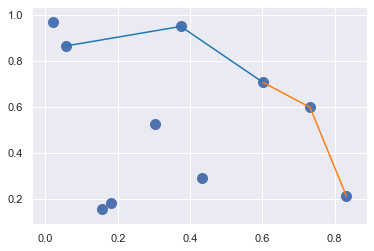

In [83]:
plt.scatter(X[:, 0], X[:, 1], s=100)
# draw lines from each point to its two nearest neighbors
K=2
for i in range(X.shape[0]):
    if i==2:
        break
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen: 
        print(i,j)
        ii = (i*2)%len(tableau20)
        plt.plot(*zip(X[j], X[i]), color=tableau20[ii])

    print("====")
plt.show()